**Начнем с импортирования необходимых библиотек**


In [82]:
import numpy as np
import matplotlib.pyplot as plt


**Теперь напишем функцию, которая представляет нашу функцию f(x):**

In [83]:
def f(x):
    return 2 - 0.5 * x**2 - 0.5 * x**-1 * np.sin(x) - x

**Отделение корней графическим методом:**

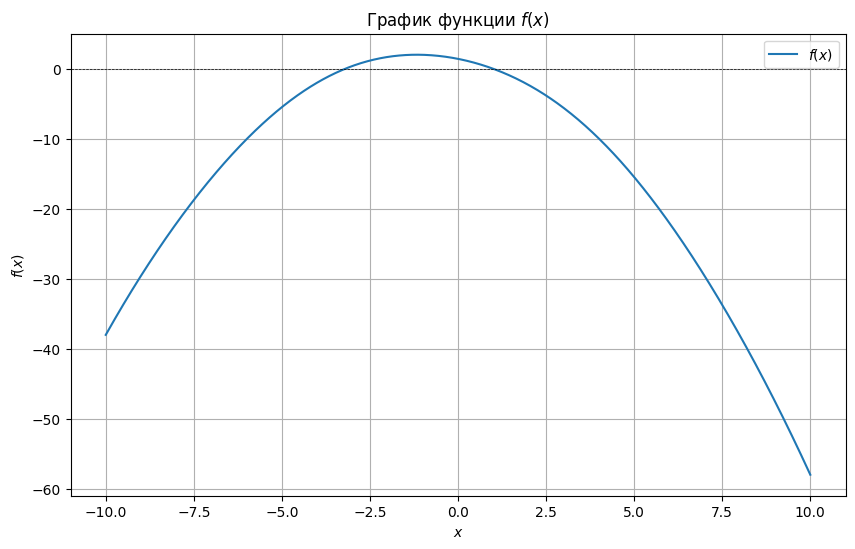

In [84]:
# Создание массива значений x
x_values = np.linspace(-10, 10, 1000)

# Получение значений y для каждого x
y_values = f(x_values)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='$f(x)$')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('График функции $f(x)$')
plt.grid(True)
plt.legend()
plt.show()

**Аналитический метод:**

In [85]:
# Задаем интервал, где будем искать корни
x_values = np.linspace(-10, 10, 1000)
y_values = f(x_values)

# Печатаем точки, где функция меняет знак
print("Intervals where the function changes sign:")
for i in range(len(x_values) - 1):
    if np.sign(y_values[i]) != np.sign(y_values[i + 1]):
        print(f"Root between {x_values[i]} and {x_values[i + 1]}")

Intervals where the function changes sign:
Root between -3.253253253253253 and -3.233233233233233
Root between 1.0310310310310307 and 1.0510510510510507


**Уточнение корней методом половинного деления:**

Root found using bisection method: -3.24303979272241
Root found using bisection method: 1.0424297588604228


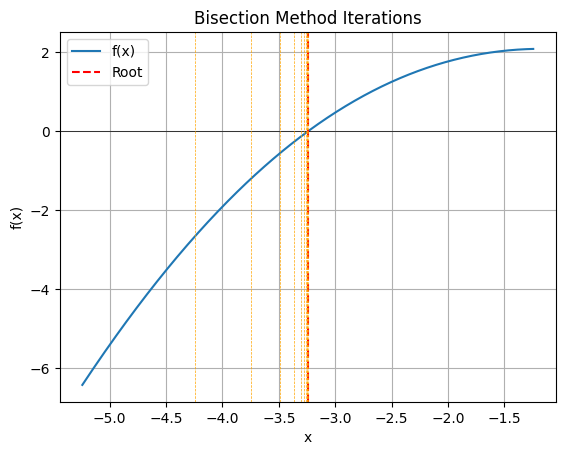

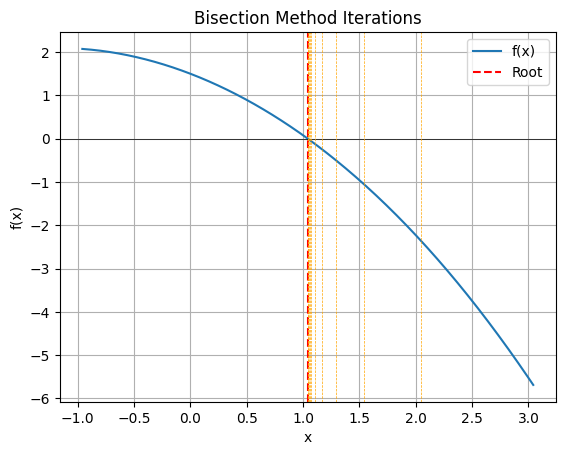

In [86]:
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    if np.sign(f(a)) == np.sign(f(b)):
        raise ValueError("The function values at the endpoints must have opposite signs")

    iter_count = 0
    while (b - a) / 2 > tol and iter_count < max_iter:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif np.sign(f(c)) == np.sign(f(a)):
            a = c
        else:
            b = c
        iter_count += 1
    return (a + b) / 2

# Найдем корни, используя найденные выше интервалы
roots_bisection = []
for i in range(len(x_values) - 1):
    if np.sign(y_values[i]) != np.sign(y_values[i + 1]):
        root = bisection_method(f, x_values[i], x_values[i + 1])
        roots_bisection.append(root)
        print(f"Root found using bisection method: {root}")

# Построим график иллюстрирующий уточнение корней
import matplotlib.pyplot as plt

def plot_bisection_process(f, a, b, root, iterations=10):
    x = np.linspace(a, b, 400)
    y = f(x)

    fig, ax = plt.subplots()
    ax.plot(x, y, label='f(x)')
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(root, color='red', linestyle='--', label='Root')
    ax.legend()

    for i in range(iterations):
        mid = (a + b) / 2
        if f(mid) == 0:
            break
        elif np.sign(f(mid)) == np.sign(f(a)):
            a = mid
        else:
            b = mid
        ax.axvline(mid, color='orange', linestyle='--', linewidth=0.5)

    plt.title("Bisection Method Iterations")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.show()

# Построим графики иллюстрирующие процесс уточнения корней для каждого найденного корня
for root in roots_bisection:
    plot_bisection_process(f, root - 2, root + 2, root)


**Уточнение корней методом итераций:**

In [87]:
import math

def f(x):
    return 2 - 0.5 * x**2 - 0.5 * (1/x) * math.sin(x) - x

def df(x):
    return -x + x**(-2) * math.sin(x) - x

def g(x):
    return x - f(x) / df(x)

def iterate_method(x0, epsilon, max_iterations=1000):
    iterations = 0
    while True:
        iterations += 1
        x1 = g(x0)
        if abs(x1 - x0) < epsilon or iterations >= max_iterations:
            break
        x0 = x1
    return x1, iterations

x0 = 1.0  # Начальное приближение
epsilon = 0.00001  # Точность
root, iterations = iterate_method(x0, epsilon)

print("Корень уравнения:", root)
print("Количество итераций:", iterations)


Корень уравнения: 1.042432252301545
Количество итераций: 13


**Уточнение корней методом Ньютона:**

In [88]:
def derivative_f(x):
    return -x - 1 + 0.5 * np.sin(x) * x**-1 - 0.5 * np.cos(x)

def newton_method(f, df, x0, tol=1e-6, max_iter=1000):
    x = x0
    for i in range(max_iter):
        x_new = x - f(x) / df(x)
        if abs(x_new - x) < tol:
            return x_new, i+1
        x = x_new
    return None, max_iter

# Начальные приближения для метода Ньютона могут быть выбраны близко к найденным корням
initial_guesses_newton = [-4, 1, 4]

# Найдем корни
roots_newton = []
for guess in initial_guesses_newton:
    root, iterations = newton_method(f, derivative_f, guess)
    if root is not None:
        roots_newton.append(root)
        print(f"Root found using Newton's method: {root} in {iterations} iterations")

Root found using Newton's method: -3.2430399525027416 in 11 iterations
Root found using Newton's method: 1.042430074593492 in 4 iterations
Root found using Newton's method: 1.042430074587814 in 6 iterations
